In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv("california.csv")

In [67]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [68]:
df.shape

(3685, 10)

In [72]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [73]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000
mean,-120.839824,37.213810,28.939756,2454.677883,480.334328,1264.039891,450.054545,3.529461,154646.467300
std,1.826785,1.730924,13.101610,1904.792751,359.970059,949.632105,336.852592,1.781342,95410.751125
min,-124.350000,32.670000,1.000000,2.000000,0.000000,6.000000,2.000000,0.499900,14999.000000
25%,-122.180000,36.510000,18.000000,1371.000000,274.000000,721.000000,259.000000,2.250000,81300.000000
50%,-121.820000,37.720000,29.000000,1988.000000,393.000000,1038.000000,369.000000,3.136400,128800.000000
75%,-119.610000,37.950000,38.000000,2964.000000,575.000000,1518.000000,536.000000,4.435600,202300.000000
max,-114.550000,41.950000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500001.000000


In [74]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.876516,-0.224452,-0.024214,-0.006718,0.073167,-0.015455,-0.091940,-0.254799
latitude,-0.876516,1.000000,0.063114,-0.007104,-0.021925,-0.127461,-0.039532,-0.049876,0.024237
housing_median_age,-0.224452,0.063114,1.000000,-0.348809,-0.314419,-0.309697,-0.292258,-0.169487,0.029927
total_rooms,-0.024214,-0.007104,-0.348809,1.000000,0.919278,0.891035,0.932497,0.316303,0.291886
total_bedrooms,-0.006718,-0.021925,-0.314419,0.919278,1.000000,0.892405,0.968920,0.093621,0.149811
population,0.073167,-0.127461,-0.309697,0.891035,0.892405,1.000000,0.929824,0.143453,0.137090
households,-0.015455,-0.039532,-0.292258,0.932497,0.968920,0.929824,1.000000,0.131342,0.178384
median_income,-0.091940,-0.049876,-0.169487,0.316303,0.093621,0.143453,0.131342,1.000000,0.783687
median_house_value,-0.254799,0.024237,0.029927,0.291886,0.149811,0.137090,0.178384,0.783687,1.000000


In [75]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [76]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [77]:
df.drop(['ocean_proximity'],axis=1,inplace=True)

In [78]:
df.longitude=df.longitude.astype(float)
df.latitude=df.latitude.astype(float)
df.total_bedrooms=df.total_bedrooms.astype(float)
df.median_income=df.median_income.astype(float)


In [79]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

# EDA

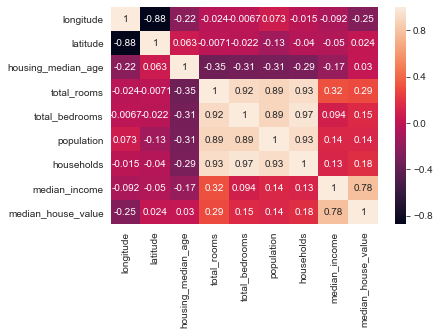

In [102]:
sns.heatmap(df.corr(),annot=True)

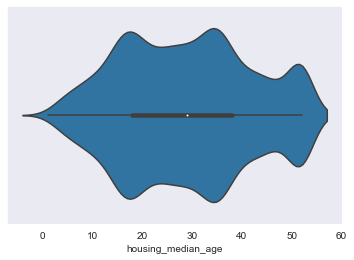

In [104]:
sns.violinplot(x='housing_median_age',data=df)

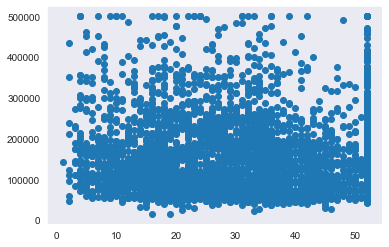

In [106]:
plt.scatter(x='housing_median_age',y='median_house_value',data=df)

# Hold Out Validation 

In [82]:
y = df[['median_house_value']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.3)

In [83]:
from timeit import default_timer as timer
start_ho = timer()

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
pred = lr.predict(x_test)
lr.score(x_train,y_train)
end_ho = timer()
time_ho = (end_ho - start_ho)
print(pred)

[[262500.]
 [ 78900.]
 [419900.]
 ...
 [ 68500.]
 [330000.]
 [139100.]]


In [89]:
start_ho_score = timer()
# model score (neg_mean_squared_error)
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, pred)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-3.332416014231713e-21


# K-Fold Cross Validation

In [90]:
x = np.array(df)
start_kfold = timer()
from sklearn.model_selection import cross_val_predict
lr_k = LinearRegression()
k_pred = cross_val_predict(lr_k, x, y, cv=10)
print(k_pred)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

[[452600.]
 [358500.]
 [352100.]
 ...
 [187500.]
 [207300.]
 [176400.]]


-2.8733996814048917e-21


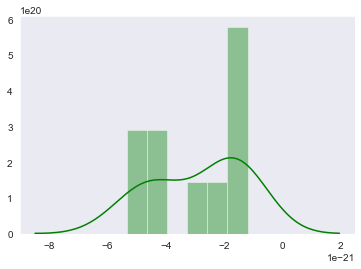

In [93]:
from sklearn.model_selection import cross_val_score
kfold_score_start = timer()
kfold_scores = cross_val_score(lr_k, x, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
sns.distplot(kfold_scores, bins=6, color='green')

# Leave One Out Cross Validation

In [94]:
start_LOO = timer()
LOO_pred = cross_val_predict(lr_k, x, y, cv=(len(x)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

In [98]:
LOO_score_start = timer()
# find the mean score from the LOO models using cross_val_score 
LOO_score = cross_val_score(lr_k, x, y, cv=(len(x)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

-4.1654750502543475e-21


In [101]:
lr.score(x_test, pred)

1.0

In [ ]:
from sklearn.externals import joblib   #save the model through joblib
joblib.dump(lr, 'california.pkl')